# Model-based versus model-free learning project: Forward learning
<font color=red>Nothing done.</font>

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import math
%matplotlib inline

# define constants for actions and transition type
LEFT = 0
RIGHT = 1
COMMON = 0
RARE = 1

# inverse temperature
tau = 10

# the matrix R defines the probability of reward on each trial for each action
R = np.zeros( (3,2,300) )
R[1:,:,0] = np.random.rand(2,2) * .5 + .25
for trial in range(1, 300):
    # write function to create random walk for each state-action
    for s in range(1,3):
        for a in range(2):
            R[s,a,trial] = R[s,a,trial-1] + np.random.normal(0,.025)
            if R[s,a,trial] < .25:
                R[s,a,trial] += 2 * (.25-R[s,a,trial])
            elif R[s,a,trial] > .75:
                R[s,a,trial] -= 2 * (R[s,a,trial]-.75)

# next_state returns the stage 2 state and whether the transition was COMMON or
# RARE in tuple: (s2, COMMON/RARE) based on action taken in stage 1
def next_state(action):
    common_rare = np.random.choice([COMMON, RARE], p=[.7, .3])
    
    if (action==LEFT and common_rare==COMMON) or (action==RIGHT and common_rare==RARE):
        return (1, common_rare)
    else:
        return (2, common_rare)
    
# softmax decision function returns probability of choosing action with value Q
# in a two-alternative choice with value of the alternate action given by Qalt
def softmax(Q, Qalt):
    global tau
    numerator = math.exp(tau * Q)
    denominator = math.exp(tau * Q) + math.exp(tau * Qalt)
    return numerator/denominator

## Problem 1

### Part A: Initialize transition and reward matrices

For model-based learning, the model must learning the probability of transitioning between states (in a transition matrix $T$) and the expectation of receiving reward in terminal states, $R_{exp}$. <b>Create two matrices, <code>T</code> and <code>Rexp</code> of size <code>3x2x3</code> and <code>3x2</code>, respectively, with initial values for each matrix element drawn from a uniform distribution from 0 to 1.</b>

### Part B: Define the algorithm to calculate $Q_{fwd}$ values

$Q$ values in model-based algorithms are calculated recursively as the weighted sum of next step $Q$ values, where weights are determined by the transition matrix $T$. For the two-stage task, we can program this algorithm in a relatively simple manner since (1) $Q$ values at the first stage are determined by second stage $Q$ values alone, and (2) $Q$ values at the second stage are determined by <code>Rexp</code>. 

<b>Write an algorithm to calculate $Q_{fwd}$ such that

    - if value is requested from stage 1 (i.e. s==0), then a value is returned that depends on T, but
    - if value is requested from stage 2 (i.e. s>0), then a value from Rexp is returned.

In [ ]:
def Qfwd(s,a):
    # if calculating Qfwd from stage 1 then sum over possible second stage states 
    # weighted by transition probability

    
    # otherwise, actions give rewards and then the trial ends

    
print(Qfwd(0,LEFT), Qfwd(0,RIGHT))

### Part C: Program the model to perform the task
It will be necessary to calculate a reward prediction error for the transition from stage 2 to reward receipt. This prediction error should be determine by 

$$ \delta_r = r - R_{exp}(s, a) $$

where $r$ is the reward earned on the trial and $s$, $a$ are the second stage state and action. Update $R_{exp}(s,a)$ according to

$$ R_{exp}(s_a) \leftarrow R_{exp}(s,a) + \eta \delta_r.$$

In [ ]:
# this is the learning rate used for updating the transition matrix
# and reward expectation
eta = .3

# store stage 2 actions for plotting
stage2_actions = []


for trial in range(300):
    '''
    STAGE 1: determine action taken, whether the transition was 
    common or rare, and what the next state is.
    '''

    
    '''
    Update the transition matrix, T, based on transition from
    stage 1 to stage 2. Don't forget to update the value for
    the stage 2 state not visited.
    '''

        
    '''
    STAGE 2: determine action taken and whether reward was earned.
    Store stage 2 state in variable s2 (value of 1 or 2) and stage
    2 action in variable a2 (value of LEFT or RIGHT)
    '''

    
    '''
    Update reward estimation matrix, Rexp, based on reward earned
    '''

    
    '''
    Store action taken on stage 2
    '''
    stage2_actions.append(2*(s2-1)+a2) # converts state-actions to (0,1,2,3)

    
'''
Plot the model performance
'''
plt.rcParams['figure.figsize'] = (5,7)
axis1 = plt.subplot(2,1,1)
a10 = np.add(np.where(np.asarray(stage2_actions)==0),1)
a11 = np.add(np.where(np.asarray(stage2_actions)==1),1)
a20 = np.add(np.where(np.asarray(stage2_actions)==2),1)
a21 = np.add(np.where(np.asarray(stage2_actions)==3),1)
axis1.plot(a10, 0*np.divide(a10,a10), 'b.')
axis1.plot(a11, 1*np.divide(a11,a11), 'g.')
axis1.plot(a20, 2*np.divide(a20,a20), 'r.')
axis1.plot(a21, 3*np.divide(a21,a21), 'c.')
plt.yticks((0,1,2,3), ('1,L', '1,R', '2,L', '2,R'))
plt.ylim(-.5,3.5)
plt.ylabel('Stage 2 Action')
plt.title('Actions with Drifting Reward Probabilities')

axis2 = plt.subplot(2,1,2)
axis2.plot(range(1,301), R[1,0,:], 'b-')
axis2.plot(range(1,301), R[1,1,:], 'g-')
axis2.plot(range(1,301), R[2,0,:], 'r-')
axis2.plot(range(1,301), R[2,1,:], 'c-')
plt.ylim(0,1)
plt.xlabel('Trial #')
plt.ylabel('Probability of Reward')

plt.show()

### Part E

<b>Copy and modify your code from Part D to reproduce Figure 1C from Otto et al.</b> 

To do this you need to store the probabilities of repeating the action taken in stage 1 based on whether the transition was <code>COMMON</code> or <code>RARE</code> and whether reward was earned on stage 2. Store these probabilities in the four arrays initialized below.

In [ ]:
# this is the learning rate used for updating the transition matrix
# and reward expectation
eta = .3

stay_common_reward = []
stay_rare_reward = []
stay_common_noreward = []
stay_rare_noreward = []

for trial in range(300):
    '''
    STAGE 1: determine action taken, whether the transition was 
    common or rare, and what the next state is.
    '''

    
    '''
    Update the transition matrix, T, based on transition from
    stage 1 to stage 2
    '''

        
    '''
    STAGE 2: determine action taken and whether reward was earned.
    Store stage 2 state in variable s2 (value of 1 or 2) and stage
    2 action in variable a2 (value of LEFT or RIGHT)
    '''

    
    '''
    Update reward estimation matrix, Rexp, based on reward earned
    '''

    
    '''
    Store stay probabilities
    '''

            

plt.rcParams['figure.figsize'] = (5,5)
(figure, axis) = plt.subplots()
axis.bar((1,3), (np.mean(stay_common_reward), np.mean(stay_common_noreward)), .75, color='blue')
axis.bar((2,4), (np.mean(stay_rare_reward), np.mean(stay_rare_noreward)), .75, color='red')
plt.ylim(.25,1)
plt.ylabel('Stay Probability')
axis.set_xticklabels(('Rewarded', 'Unrewarded'))
axis.set_xticks((1.5, 3.5))
plt.legend(('Common', 'Rare'))
plt.title('Model Free')

plt.show()

## Problem 2

The following code defines and draws a maze. The green circle is the starting position (stored in the tuple <code>maze.start</code>) and the red circle is where reward is delivered.

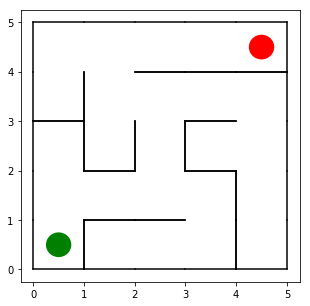

In [3]:
class Maze:
    size_rows = 5
    size_cols = 5
    
    start = (0,0)
    
    # 4 possible actions: 0-UP, 1-RIGHT, 2-DOWN, 3-LEFT
    actions = np.zeros( (size_rows, size_cols, 4) )
    # reward for each state is defined in init_rewards
    reward = np.zeros( (size_rows, size_cols) )
    
    def get_actions(self, state):
        action_array = self.actions[state[0], state[1]]
        return [i for i in range(len(action_array)) if action_array[i]]
    
    def get_reward(self, state):
        return self.reward[state[0], state[1]]
    
    def is_terminal_state(self, state):
        t = [(0,2), (1,0), (1,2), (0,3), (3,2)]
        t += [(4,0), (4,4)]
        
        if state in t:
            return True
        else:
            return False
    
    def next_state(self, state, action):
        a = self.get_actions((state[0], state[1]))
        if action in a:
            state_delta = [ (0,1), (1,0), (0,-1), (-1,0) ]
            return (state[0] + state_delta[action][0], state[1] + state_delta[action][1])
        else:
            return state
        
    def draw_with_path(self, path, title=''):
        plt.rcParams['figure.figsize'] = (5,5)
        (figure, axis) = plt.subplots()
        for i in range(self.size_rows):
            for j in range(self.size_cols):
                if (i,j) == self.start:
                    circle = plt.Circle((i+.5, j+.5), radius=0.25, fc='g')
                    axis.add_patch(circle)
                    
                if self.reward[i,j]:
                    circle = plt.Circle((i+.5, j+.5), radius=0.25, fc='r')
                    axis.add_patch(circle)
                
                a = self.actions[i,j]
                if not a[0]: # UP
                    axis.plot([i, i+1], [j+1, j+1], 'k-')
                if not a[1]: # RIGHT
                    axis.plot([i+1,i+1], [j, j+1], 'k-')
                if not a[2]: # DOWN
                    axis.plot([i,i+1], [j, j], 'k-')
                if not a[3]: # LEFT
                    axis.plot([i,i], [j, j+1], 'k-')
        
        plt.Circle((.5, .5), radius=0.25, fc='g')
        
        r1 = (0.5,0.5)
        for i in range(1, len(path)):
            r2 = np.random.uniform(.3,.7,2) if i<len(path)-1 else (.5,.5)
            s1 = np.add(path[i-1], r1)
            s2 = np.add(path[i], r2)
            r1 = r2
            
            axis.plot([s1[0], s2[0]], [s1[1], s2[1]], 'm-.')
        
        if len(title):
            plt.title(title)
        
        plt.show()
      
    def draw(self):
        self.draw_with_path([])
    
    def init_actions(self):
        # first, make all actions illegal
        self.actions = np.zeros( (self.size_rows,self.size_cols,4) )
        
        # now let's draw a maze
        self.actions[0,0,0] = 1
        self.actions[0,1,2] = 1
        self.actions[0,1,0] = 1
        self.actions[0,1,1] = 1
        self.actions[0,2,2] = 1
        self.actions[1,1,3] = 1
        self.actions[1,1,1] = 1
        self.actions[2,1,3] = 1
        self.actions[2,1,1] = 1
        self.actions[3,1,3] = 1
        self.actions[3,1,2] = 1
        self.actions[3,0,0] = 1
        self.actions[3,0,3] = 1
        self.actions[2,0,1] = 1
        self.actions[2,0,3] = 1
        self.actions[1,0,1] = 1
        self.actions[2,1,0] = 1
        self.actions[2,2,2] = 1
        self.actions[2,2,0] = 1
        self.actions[2,3,2] = 1
        self.actions[2,3,1] = 1
        self.actions[2,3,3] = 1
        self.actions[1,3,1] = 1
        self.actions[1,3,2] = 1
        self.actions[1,2,0] = 1
        self.actions[3,3,3] = 1
        self.actions[3,3,1] = 1
        self.actions[4,3,3] = 1
        self.actions[4,3,2] = 1
        self.actions[4,2,0] = 1
        self.actions[4,2,3] = 1
        self.actions[3,2,1] = 1
        self.actions[4,2,2] = 1
        self.actions[4,1,0] = 1
        self.actions[4,1,2] = 1
        self.actions[4,0,0] = 1
        self.actions[1,3,0] = 1
        self.actions[1,4,2] = 1
        self.actions[1,4,3] = 1
        self.actions[0,4,1] = 1
        self.actions[0,4,2] = 1
        self.actions[0,3,0] = 1
        self.actions[1,4,1] = 1
        self.actions[2,4,3] = 1
        self.actions[2,4,1] = 1
        self.actions[3,4,3] = 1
        self.actions[3,4,1] = 1
        self.actions[4,4,3] = 1
    
    def init_rewards(self):
        self.reward = np.zeros( (self.size_rows, self.size_cols) )
        self.reward[self.size_rows-1,self.size_cols-1] = 1
    
    def __init__(self):
        self.init_actions()
        self.init_rewards()
        
maze = Maze()
maze.draw()

In [ ]:
# inverse temperature – adjust this as you see fit
tau = 10

def Ps(Q, Qall):
    global tau
    numerator = math.exp(tau * Q)
    
    denominator = 0
    for i in range(len(Qall)):
        denominator += math.exp(tau * Qall[i])
    
    return numerator / denominator

### Part A

Generally, we would begin by initializing a transition matrix, $T$, and a matrix of the expected reward at each state, $R_{exp}$. However, for simplicity, we can take advantage of the fact that state transitions are deterministic and that the maze returns the state $s'$ reached when taking action $a$ in state $s$ using <code>s_prime = maze.next_state(s, a)</code>.

However, let's not assume that the model knows the rewards that are available in the maze, so that there is <i>something</i> to learn. <b>Initialize <code>Rexp</code> as matrix of size <code>5x5</code></b>. As in problem 1, values for elements in the matrices should be drawn from uniform distributions between 0 and 1. The sizes of this matrix is determined by the fact that the maze is 5x5 in size. Each position is represented by a two positions – left-right, and down-up.

### Part B

This is almost exactly the same maze code as in the previous assignment. However, for the sake of tree search efficiency, an additional method has been added to <code>Maze</code> that defines dead end positions in the maze as terminal states. This will be important for you since $Q_{fwd}$ values are calculated by searching forward until a terminal state. $Q_{fwd}$ should therefore be equal to <code>maze.get_reward(s)</code> if <code>maze.is_terminal_state(s)</code> is <code>True</code> or if <code>s==maze.start</code>. Otherwise, $Q_{fwd}$ should be equal to the maximum of $Q_{fwd}$ values for states that are achievable after taking action $a$ in state $s$.

<b>Define a <code>Qfwd</code> function for the maze.</b>

When calculating the list of actions available after transitioning from $s$ to $s'$ you should ignore actions, $a'$, that return to $s$. Without this, forward search gets stuck in infinite regressive search $s \rightarrow s' \rightarrow s \rightarrow s' \rightarrow etc.$

In [ ]:
def Qfwd(s,a):
    # determine state reached by taking action a in state s

    # test if the next state is a terminal state or the start state
    # and return value from Rexp if so

    
    # otherwise, return the maximum Q value achievable from the next state

    

### Part C

We can now create a skeleton for a $Q_{fwd}$-learning model in the following way:

In [ ]:
# start at intended beginning location
s = maze.start
# store all traversed positions in maze in list for drawing at end
s_hist = [s]

# navigate until reward is reached
while not maze.is_terminal_state(s):
    # find all possible actions from current position
    a_poss = maze.get_actions(s)

    # calculate Q-values for all actions from the current state
    Qall = [Qfwd(s,a) for a in a_poss]

    # convert Q-values into probability of selection using softmax function
    Ps_all = [Ps(Q, Qall) for Q in Qall]
    
    # randomly select action based on probability of selection
    a = np.random.choice(a_poss, p=Ps_all)

    # determine next state
    s_prime = maze.next_state(s, a)
    
    # reward earned?
    if maze.is_terminal_state(s_prime) or s_prime==maze.start:
        r = maze.get_reward(s)

    # update s and add to list of visited states
    s = s_prime
    s_hist.append(s)

# draw the maze with the random path
maze.draw_with_path(s_hist)   

<b>Write the learning algorithm. 

Plot the number of actions required to reach the reward on 100 runs through the maze as a function of trial number.</b>

In [ ]:
# learning rate for Rexp
eta = 0.5

# things to plot
step_counts = []
rewards_earned = []

# reinitialize Rexp


for trial in range(100):
    num_steps = 0
    
    s = maze.start
    s_hist = [s]
    
    while not maze.is_terminal_state(s):
        
        # This is where your algorithm goes. I recommend starting with the algorithm
        # structure above.
            
        # add s to list of visited states
        s_hist.append(s)
        
        num_steps += 1
        
    if trial == 0:
        s_hist_init = s_hist.copy()
    
    step_counts.append(num_steps)
    rewards_earned.append(r)


maze.draw_with_path(s_hist_init, 'Initial')
maze.draw_with_path(s_hist, 'Final')

(figure,axis) = plt.subplots()
axis.plot(step_counts)
plt.xlabel('Trial #')
plt.ylabel('Steps taken')
plt.title('Learning')
plt.show()

(figure,axis) = plt.subplots()
axis.plot(rewards_earned)
plt.xlabel('Trial #')
plt.ylabel('Reward earned')
plt.title('Learning')
plt.show()